In [115]:
# Define example markdown

markdown = """\
- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which library should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected ^alt2
	- [ ] Implement syntax highlighting component
		- This will be a React component
		- [/] Create basic highlighter class
		- [ ] Add custom rules for node types
		- [ ] Connect to rendering pipeline
	- [I] Could add visual indicators for different node states
	- [ ] Write tests for highlighting edge cases
"""

print(markdown)

- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which library should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected ^alt2
	- [ ] Implement syntax highlighting component
		- This will be a React component
		- [/] Create basic highlighter class
		- [ ] Add custom rules for node types
		- [ ] Connect to rendering pipeline
	- [I] Could add visual indicators for different node states
	- [ ] Write tests for highlighting edge cases



In [116]:
from cannonball.utils import walk_list_items, print_ast
from marko import Markdown

mdparser = Markdown()
ast = mdparser.parse(markdown)
print(markdown)
print("-" * 40)
print_ast(ast)

- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which library should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected ^alt2
	- [ ] Implement syntax highlighting component
		- This will be a React component
		- [/] Create basic highlighter class
		- [ ] Add custom rules for node types
		- [ ] Connect to rendering pipeline
	- [I] Could add visual indicators for different node states
	- [ ] Write tests for highlighting edge cases

----------------------------------------
- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which library should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Pris

In [117]:
from cannonball.utils import get_raw_text_from_listtem

lis = list(walk_list_items(ast))
output_str = ""
for item, parent, level in lis:
    output_str += "\t" * level + "- " + get_raw_text_from_listtem(item) + "\n"

assert output_str == markdown, "Markdown and output not the same!"

In [121]:
from cannonball.utils import extract_node_type_and_ref

lis = list(
    walk_list_items(
        ast,
        apply_fn=lambda i, _p, _2: extract_node_type_and_ref(
            get_raw_text_from_listtem(i)
        ),
    )
)

for li in lis:
    print(li)

('g', 'Add syntax highlighting for Cannonball markdown ^fea', 'feature3')
('?', 'Which library should we use for highlighting? ^q1', 'q1')
('a', 'Use Prism.js ^alt', 'alt1')
('o', 'Has good React integration', None)
('P', 'May need custom language definition', None)
(' ', 'Research custom grammar in Prism', None)
('a', 'Use highlight.js ^alt', 'alt2')
('o', 'More lightweight', None)
('o', 'Easier to customize', None)
('D', 'Selected ^alt', 'alt2')
(' ', 'Implement syntax highlighting component', None)
('unknown', 'This will be a React component', None)
('/', 'Create basic highlighter class', None)
(' ', 'Add custom rules for node types', None)
(' ', 'Connect to rendering pipeline', None)
('I', 'Could add visual indicators for different node states', None)
(' ', 'Write tests for highlighting edge cases', None)


In [ ]:
from marko import Markdown
from marko.block import ListItem
from itertools import count
import networkx as nx


def process_list_item(item: ListItem, graph: nx.DiGraph, counter, parent_id=None):
    """Process a ListItem node and add it to the graph with appropriate edges."""

    assert isinstance(item, ListItem), "Expected a ListItem node"

    # Get the text content of the paragraph in the list item
    paragraph = item.children[0]
    text = paragraph.children[0].children

    # Extract node type, content, and reference ID
    node_type, content, ref = extract_node_type_and_ref(text)

    # Create a unique node ID
    node_id = next(counter)

    # Add node to graph with attributes
    graph.add_node(node_id, type=node_type, content=content, ref=ref)

    # Connect to parent if exists
    if parent_id is not None:
        graph.add_edge(parent_id, node_id)

    # Process children recursively if they exist
    if len(item.children) > 1 and hasattr(item.children[1], "children"):
        child_list = item.children[1]
        for child_item in child_list.children:
            process_list_item(child_item, graph, counter, node_id)

    return node_id


def build_graph_from_ast(ast):
    """Build a NetworkX graph from a Marko AST."""
    graph = nx.DiGraph()
    counter = count()

    # Start with the top-level list
    for child in ast.children:
        # if child is of type ListItem, process it
        if isinstance(child, ListItem):
            process_list_item(child, graph, counter)

    # Post-processing: connect nodes based on reference IDs
    # Create a mapping of refs to node_ids
    # ref_mapping = {data["ref"]: node_id for node_id, data in graph.nodes(data=True) if data["ref"] is not None}

    # # Look for references in the content and create edges
    # for node_id, data in graph.nodes(data=True):
    #     if data["content"]:
    #         for ref in re.finditer(r"\^(\w+)", data["content"]):
    #             ref = ref.group(1)
    #             if ref in ref_mapping and ref_mapping[ref] != node_id:  # Avoid self-loops
    #                 referenced_node = ref_mapping[ref]
    #                 # Add an edge to the referenced node
    #                 graph.add_edge(node_id, referenced_node)

    return graph


# Parse the markdown
markdown_text = """
- [g] Add syntax highlighting for Cannonball markdown ^feature3
	- [?] Which library should we use for highlighting? ^q1
		- [a] Use Prism.js ^alt1
			- [o] Has good React integration
			- [P] May need custom language definition
				- [ ] Research custom grammar in Prism
		- [a] Use highlight.js ^alt2
			- [o] More lightweight
			- [o] Easier to customize
		- [D] Selected ^alt2
	- [ ] Implement syntax highlighting component
		- [/] Create basic highlighter class
		- [ ] Add custom rules for node types
		- [ ] Connect to rendering pipeline
	- [I] Could add visual indicators for different node states
	- [ ] Write tests for highlighting edge cases
"""

mdparser = Markdown()
ast = mdparser.parse(markdown_text)

# Build the graph
graph = build_graph_from_ast(ast)

# Analyze the resulting graph
print(f"Graph has {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges")
print("Nodes:")
for node_id, attrs in graph.nodes(data=True):
    print(f"Node {node_id}: [{attrs['type']}] {attrs['content']} (ref: {attrs['ref']})")

print("\nEdges (parent → child):")
for source, target in graph.edges():
    source_type = graph.nodes[source]["type"]
    target_type = graph.nodes[target]["type"]
    print(f"Node {source} [{source_type}] → Node {target} [{target_type}]")

Graph has 0 nodes and 0 edges
Nodes:

Edges (parent → child):


In [ ]:
# Confirm it is a DAG
assert nx.is_directed_acyclic_graph(graph), "Graph is not a DAG"

# Topological sort of DAGs
list(nx.topological_sort(graph))

[(2, 1, 'forward'), (1, 2, 'forward')]


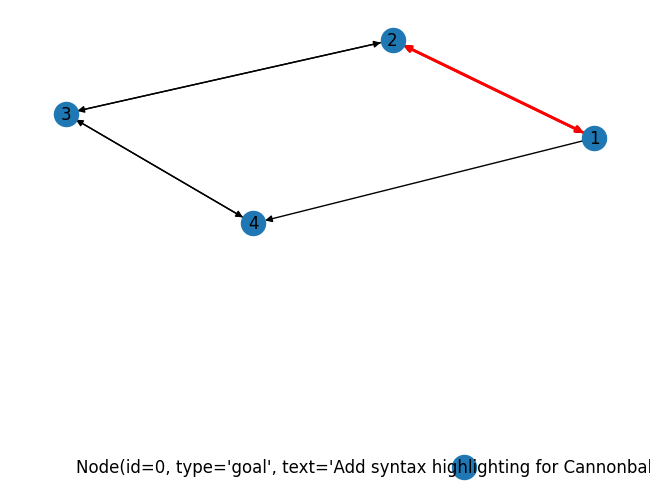

In [35]:
# Draw graph
pos = nx.spring_layout(graph, seed=8020)
nx.draw(
    graph,
    pos,
    with_labels=True,
)

# Detect cycles

# The `orientation` parameter can be used to determine how directed edges are
# treated and the reporting of edge direction in the cycle
try:
    cycle = nx.find_cycle(graph, orientation="original")
    # Highlight the cycle in red
    nx.draw_networkx_edges(graph, pos, edgelist=cycle, edge_color="r", width=2)
except nx.NetworkXNoCycle:
    pass

print(cycle)